# Importing Dependencies Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Data Collection and Analysis

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking Miissing Values 

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [9]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

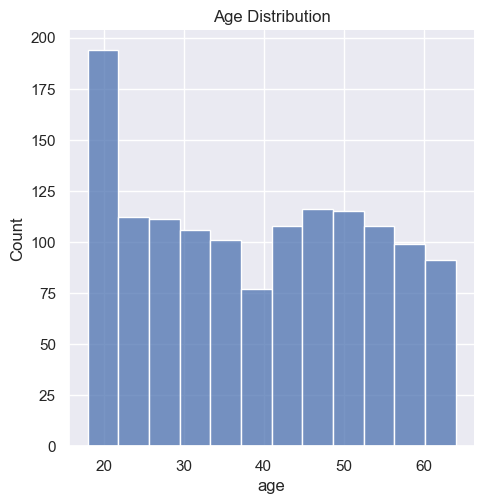

In [10]:
# Distribution of age Value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

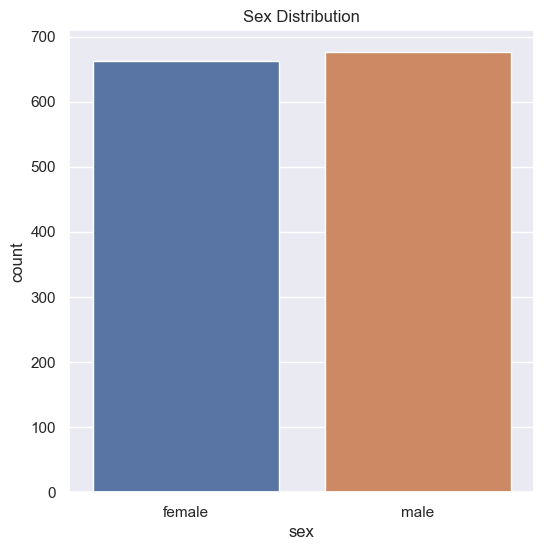

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

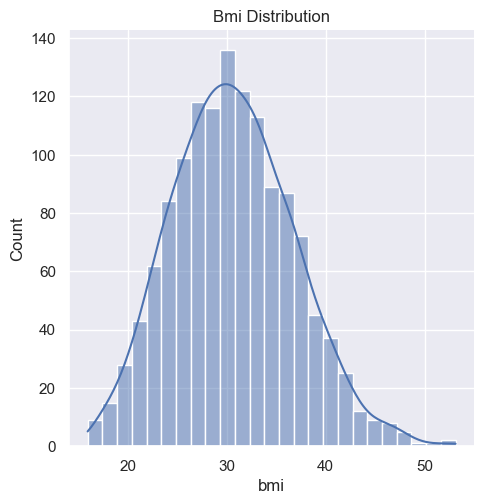

In [12]:
#bmi distribution of dataset
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'], kde=True)
plt.title('Bmi Distribution')
plt.show()

Normal BMI Range ==> 18 to 24.9

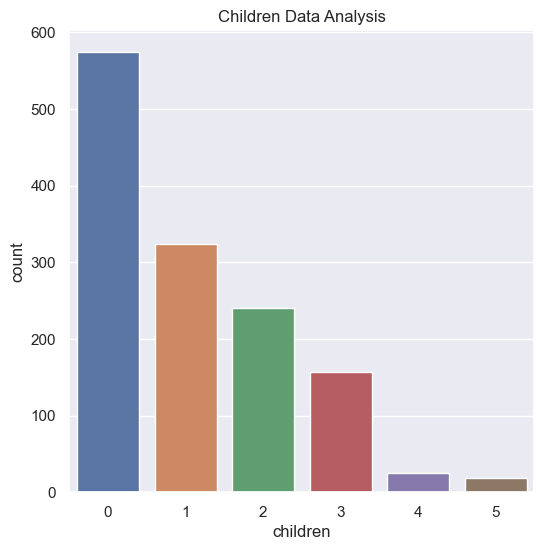

In [13]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Data Analysis')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

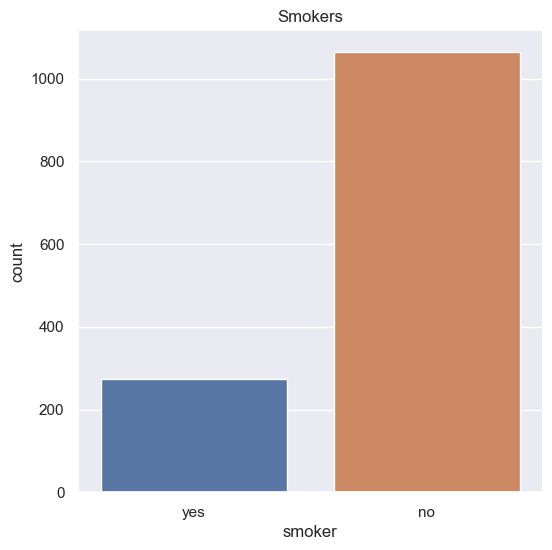

In [15]:
#smokers
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smokers')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

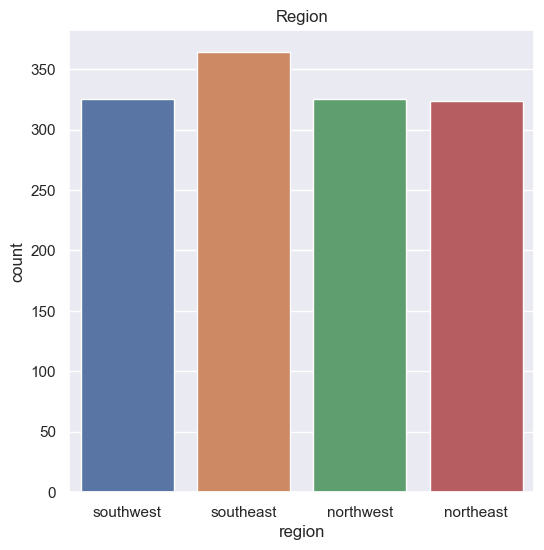

In [17]:
#Regions
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

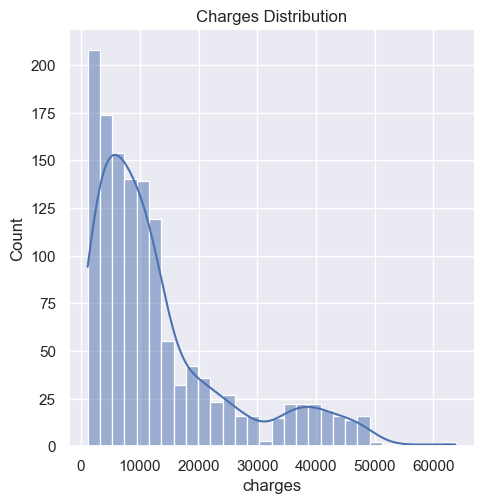

In [19]:
#Charges Distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

In [20]:
#encoding sex coloumn
insurance_dataset.replace({'sex':{'male':0 ,'female':1}}, inplace=True)

#encoding smoker coloumn
insurance_dataset.replace({'smoker':{'yes':0 ,'no':1}}, inplace=True)

#encoding region coloumn
insurance_dataset.replace({'region':{'southeast':0 ,'southwest':1,'northeast':2 ,'northwest':3}}, inplace=True)


In [21]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the Featues and Target

In [22]:
#x=insurance_dataset['age','sex','bmi','children','smoker','region']
#x= insurance_dataset.drop(columns='charges',axis=1)
#y=insurance_dataset['charges']

In [23]:
x=pd.DataFrame(insurance_dataset, columns=['age','sex','bmi','children','smoker','region'])
y=insurance_dataset['charges']

In [24]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [25]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into the Testing and Training Data

In [26]:
x_train,x_test,y_train ,y_test =train_test_split(x,y,test_size=0.2 ,random_state=42)

In [27]:
print(x_train)

      age  sex     bmi  children  smoker  region
560    46    1  19.950         2       1       3
1285   47    1  24.320         0       1       2
1142   52    1  24.860         0       1       0
969    39    1  34.320         5       1       0
486    54    1  21.470         3       1       3
...   ...  ...     ...       ...     ...     ...
1095   18    1  31.350         4       1       2
1130   39    1  23.870         5       1       0
1294   58    0  25.175         0       1       2
860    37    1  47.600         2       0       1
1126   55    0  29.900         0       1       1

[1070 rows x 6 columns]


In [28]:
print(x_test)

      age  sex     bmi  children  smoker  region
764    45    1  25.175         2       1       2
887    36    1  30.020         0       1       3
890    64    1  26.885         0       0       3
1293   46    0  25.745         3       1       3
259    19    0  31.920         0       0       3
...   ...  ...     ...       ...     ...     ...
109    63    0  35.090         0       0       0
575    58    1  27.170         0       1       3
535    38    0  28.025         1       1       2
543    54    1  47.410         0       0       0
846    51    1  34.200         1       1       1

[268 rows x 6 columns]


In [29]:
print(y_train)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


In [30]:
print(y_test)

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64


In [31]:
print(x.shape,x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

Linear Regrssion Model

In [32]:
#loading linear regression model
LRmodel= LinearRegression()

In [33]:
LRmodel.fit(x_train, y_train)

LinearRegression()

In [34]:
LRmodel.coef_

array([ 2.56625541e+02,  1.71347528e+01,  3.35095743e+02,  4.22627296e+02,
       -2.36724982e+04,  1.65804576e+02])

In [35]:
LRmodel.intercept_

11091.599927557018

In [36]:
# Model Evaluation

In [37]:
#Predict on training data
#training_data_prediction =LRmodelpredict(x_train)

In [38]:
#R squared values
#r2_train = r2_score(y_train,training_data_prediction)
#print('R Squared Value:', r2_train)

In [39]:
#prediction on test data
test_data_prediction=LRmodel.predict(x_test)

In [40]:
#R squared values
r2_test = r2_score(y_test,test_data_prediction)
print('R Squared Value:', r2_test)

R Squared Value: 0.783021587162344


# Building the Pedictive System

In [41]:
#input_data=(18,0,33.77,1,1,0)
#changing input_data to a numpy aarray 
#input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
#input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
#prediction=regressor.predict(input_data_reshaped)
#print(prediction)

In [42]:
input_data=input("Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. ")
input_data_splited=input_data.split(",")
#changing input_data to a numpy aarray 
input_data_as_numpy_array=np.asarray(input_data_splited,dtype=float)
#reshape the array
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
prediction=LRmodel.predict(input_data_reshaped)
print(prediction)

Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. 19,1,27.9,0,0,1
[25499.59576231]


D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)
RFmodel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [66]:
test_data_pred = RFmodel.predict(x_test)

# Evaluate the model
mae = r2_score(y_test, test_data_pred)
print(f'r2_score: {mae}')

r2_score: 0.8672774588750145


In [46]:
input_data=input("Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. ")
input_data_splited=input_data.split(",")
#changing input_data to a numpy aarray 
input_data_as_numpy_array=np.asarray(input_data_splited,dtype=float)
#reshape the array
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
prediction=RFmodel.predict(input_data_reshaped)
print(prediction)

Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. 19,1,27.9,0,0,1
[17065.312121]


D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Gradient Boosted Trees Model

In [47]:
from xgboost import XGBRegressor

In [65]:
XGBmodel = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
XGBmodel.fit(x_train, y_train)

# Make predictions on the test set
test_data_predi = XGBmodel.predict(x_test)

# Evaluate the model
maee = r2_score(y_test, test_data_predi)
print(f'r3_score: {maee}')

r3_score: 0.8713979034955605


In [49]:
input_data=input("Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. ")
input_data_splited=input_data.split(",")
#changing input_data to a numpy aarray 
input_data_as_numpy_array=np.asarray(input_data_splited,dtype=float)
#reshape the array
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
prediction=XGBmodel.predict(input_data_reshaped)
print(prediction)

Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. 19,1,27.9,0,0,1
[17212.13]


Neural Network Model

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Build the neural network model
NNmodel = Sequential()
NNmodel.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
NNmodel.add(Dense(32, activation='relu'))
NNmodel.add(Dense(1, activation='linear'))

# Compile the model
NNmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
NNmodel.fit(X_train_scaled, y_train, epochs=2000, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
Y_predic = NNmodel.predict(X_test_scaled)
mae = mean_absolute_error(y_test, Y_predic)
r2 = r2_score(y_test, Y_predic)
print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R2 Score on Test Set: {r2}')

Epoch 1/2000
27/27 [==============================] - 1s 9ms/step - loss: 325448256.0000 - val_loss: 310321856.0000
Epoch 2/2000
27/27 [==============================] - 0s 4ms/step - loss: 325393440.0000 - val_loss: 310258400.0000
Epoch 3/2000
27/27 [==============================] - 0s 3ms/step - loss: 325303616.0000 - val_loss: 310144704.0000
Epoch 4/2000
27/27 [==============================] - 0s 3ms/step - loss: 325140352.0000 - val_loss: 309944672.0000
Epoch 5/2000
27/27 [==============================] - 0s 3ms/step - loss: 324863328.0000 - val_loss: 309603616.0000
Epoch 6/2000
27/27 [==============================] - 0s 4ms/step - loss: 324410656.0000 - val_loss: 309073376.0000
Epoch 7/2000
27/27 [==============================] - 0s 3ms/step - loss: 323726304.0000 - val_loss: 308296672.0000
Epoch 8/2000
27/27 [==============================] - 0s 4ms/step - loss: 322739456.0000 - val_loss: 307222880.0000
Epoch 9/2000
27/27 [==============================] - 0s 3ms/step - loss

In [76]:
input_data=input("Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. ")
input_data_splited=input_data.split(",")
#changing input_data to a numpy aarray 
input_data_as_numpy_array=np.asarray(input_data_splited,dtype=float)
#reshape the array
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
#prediction=NNmodel.predict(input_data_reshaped)
prediction=NNmodel.predict(input_data_reshaped).flatten()[0]
print(prediction/10)

Enter the values such as age,sex,bmi,children,smoker,region in same order seperated with ','. 19,1,27.9,0,0,1
1/1 [==============================] - 0s 35ms/step
15142.9984375


# Web App

In [ ]:
#import streamlit as st
#st.title("Medical Insurance Cost Prediction Model")
#input_text=st.text_input("Enter Person All Features")
#input_text_splited=input_text.split(",")
#try:
#   input_data_as_numpy_array=np.asarray(input_text_splited,dtype=float)
#    prediction=regressor.predict(input_data_as_numpy_array.reshape(1,-1))
 #   st.write("Medical Insurance For this Person is: \n",prediction[0])
#except ValueError:
 #   st.write("Please Enter numerical Values")

In [ ]:
#import pickle
#pickle.dump(regressor,open("predictor.pkl","wb"))